In [2]:
!pip install durable_rules

     |████████████████████████████████| 61kB 2.1MB/s 
  Created wheel for durable-rules: filename=durable_rules-2.0.28-cp36-cp36m-linux_x86_64.whl size=175329 sha256=87dbc5b8e8aa904e8d0f33f614eacbff741c30a69c3d29507a19d523343cb955
  Stored in directory: /root/.cache/pip/wheels/97/f5/6b/dabbc5d4c2571374b0e0c49d8c80c449220d3061c20b057ba4
Successfully built durable-rules


In [ ]:
from durable.lang import ruleset, _main_host

if _main_host is not None:
    _main_host._ruleset_directory.clear()

with ruleset('testRS'):     #규칙집합
    #antecendent(조건부). @when_all, @when_any를 사용하여 표기
    @when_all(m.subject == 'World') # m: rule이 적용되는 데이터
    def say_hello(c):
        #consequent(조건부)
        print('Hello {0}'.format(c.m.subject))


post('testRS', { 'subject' : 'World'}) #규칙 집합에 데이터 'subject' : 'World' 전달



Hello World


{'$s': 1, 'id': 'sid-0', 'sid': '0'}

In [4]:
from durable.lang import *

with ruleset('animal'):
  @when_all(c.first << (m.predicate == 'eats') & (m.object == 'flies'),
            (m.predicate == 'lives') & (m.object == 'water') & (m.subject == c.first.subject))
  def frog(c):
    c.assert_fact({ 'subject': c.first.subject, 'predicate': 'is', 'object': 'frog'})

  @when_all(c.first << (m.predicate == 'eats') & (m.object == 'flies'),
            (m.predicate == 'lives') & (m.object == 'land') & (m.subject == c.first.subject))
  def chameleon(c):
    c.assert_fact({ 'subject': c.first.subject, 'predicate': 'is', 'object': 'chameleon'})

  @when_all((m.predicate == 'eats') & (m.object == 'worms'))
  def bird(c):
    c.assert_fact({ 'subject': c.m.subject, 'predicate': 'is', 'object': 'bird'})

  @when_all((m.predicate == 'is') & (m.object == 'frog'))
  def green(c):
    c.assert_fact({ 'subject': c.m.subject, 'predicate': 'is', 'object': 'green' })

  @when_all((m.predicate == 'is') & (m.object == 'chameleon'))
  def gray(c):
    c.assert_fact({ 'subject': c.m.subject, 'predicate': 'is', 'object': 'gray' })

  @when_all((m.predicate == 'is') & (m.object == 'bird'))
  def black(c):
    c.assert_fact({ 'subject': c.m.subject, 'predicate': 'is', 'object': 'black' })

  @when_all(+m.subject)
  def output(c):
    print('Fact: {0} {1} {2}'.format(c.m.subject, c.m.predicate, c.m.object))

assert_fact('animal', { 'subject': 'Kermit', 'predicate': 'eats', 'object': 'flies' })
assert_fact('animal', { 'subject': 'Kermit', 'predicate': 'lives', 'object': 'water' })
assert_fact('animal', { 'subject': 'Greedy', 'predicate': 'eats', 'object': 'flies' })
assert_fact('animal', { 'subject': 'Greedy', 'predicate': 'lives', 'object': 'land' })
assert_fact('animal', { 'subject': 'Tweety', 'predicate': 'eats', 'object': 'worms' })

Fact: Kermit eats flies
Fact: Kermit is green
Fact: Kermit is frog
Fact: Kermit lives water
Fact: Greedy eats flies
Fact: Greedy is gray
Fact: Greedy is chameleon
Fact: Greedy lives land
Fact: Tweety is black
Fact: Tweety is bird
Fact: Tweety eats worms


{'$s': 1, 'id': 'sid-0', 'sid': '0'}

In [ ]:
from durable.lang import *

if _main_host is not None:
    _main_host._ruleset_directory.clear()

with ruleset('risk'):
    @when_all(c.first << m.t == 'purchase',
              c.second << m.location != c.first.location)
    def fraud(c):
        print('이상거래 탐지 -> {0}, {1}'.format(c.first.location, c.second.location))

post('risk', {'t' : 'purchase', 'location' : 'US'})
post('risk', {'t' : 'purchase', 'location' : 'CA'})


이상거래 탐지 -> CA, US


{'$s': 1, 'id': 'sid-0', 'sid': '0'}

In [ ]:
from durable.lang import *

if _main_host is not None:
    _main_host._ruleset_directory.clear()

with ruleset('bookstore'):
    @when_all(+m.status) # status를 갖는 것에 대해서 실행되는 규칙
    def event(c):
        print('bookstore->Reference {0} status{1}'.format(c.m.reference, c.m.status))


    @when_all(+m.name)
    def fact(c):
        print('bookstore->Added {0} "{0}"'.format(c.m.name))


    @when_all(none(+m.name)) #name이 없는 것(삭제되는것)에 호출
    def empty(c):
        print('bookstore -> NO book')


assert_fact('bookstore', {
    'name' : 'The new book',
    'seller' : 'bookstore',
    'reference' : '75323' ,
    'price' : 500
})

    #기존의 fact를 다시 추가하는 경우 MessageObservedError 발생
try:
    assert_fact('bookstore', {
        'reference': '75323',
        'name': 'The new book',
        'price': 500,
        'seller': 'bookstore'
    })
except BaseException as e:
    print('Error : {0}'.format(e.message))

post('bookstore', {
    'reference' : '75323',
    'status' : 'Active'
})

retract_fact('bookstore', {
    'reference' : '75323',
    'name' : 'The new book',
    'price' : 500,
    'seller' : 'bookstore'
})



bookstore->Added The new book "The new book"
Error : Message has already been observed: {"reference": "75323", "name": "The new book", "price": 500, "seller": "bookstore"}
bookstore->Reference 75323 statusActive
bookstore -> NO book


{'$s': 1, 'id': 'sid-0', 'sid': '0'}

In [ ]:
!pip install spacy


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp("i have seen the handsome boy with an apple")

for tok in doc:
    print(tok.text, tok.lemma_, tok.pos_, tok.tag_, tok.dep, tok.shape_,
          tok.is_alpha, tok.is_stop)

i i PRON PRP 429 x True True
have have AUX VBP 405 xxxx True True
seen see VERB VBN 8206900633647566924 xxxx True False
the the DET DT 415 xxx True True
handsome handsome ADJ JJ 402 xxxx True False
boy boy NOUN NN 416 xxx True False
with with ADP IN 443 xxxx True True
an an DET DT 415 xx True True
apple apple NOUN NN 439 xxxx True False


In [ ]:
!pip install ipython

Node: ['a', 1, 'b']
Edge: [(1, 'a'), (1, 'b')]


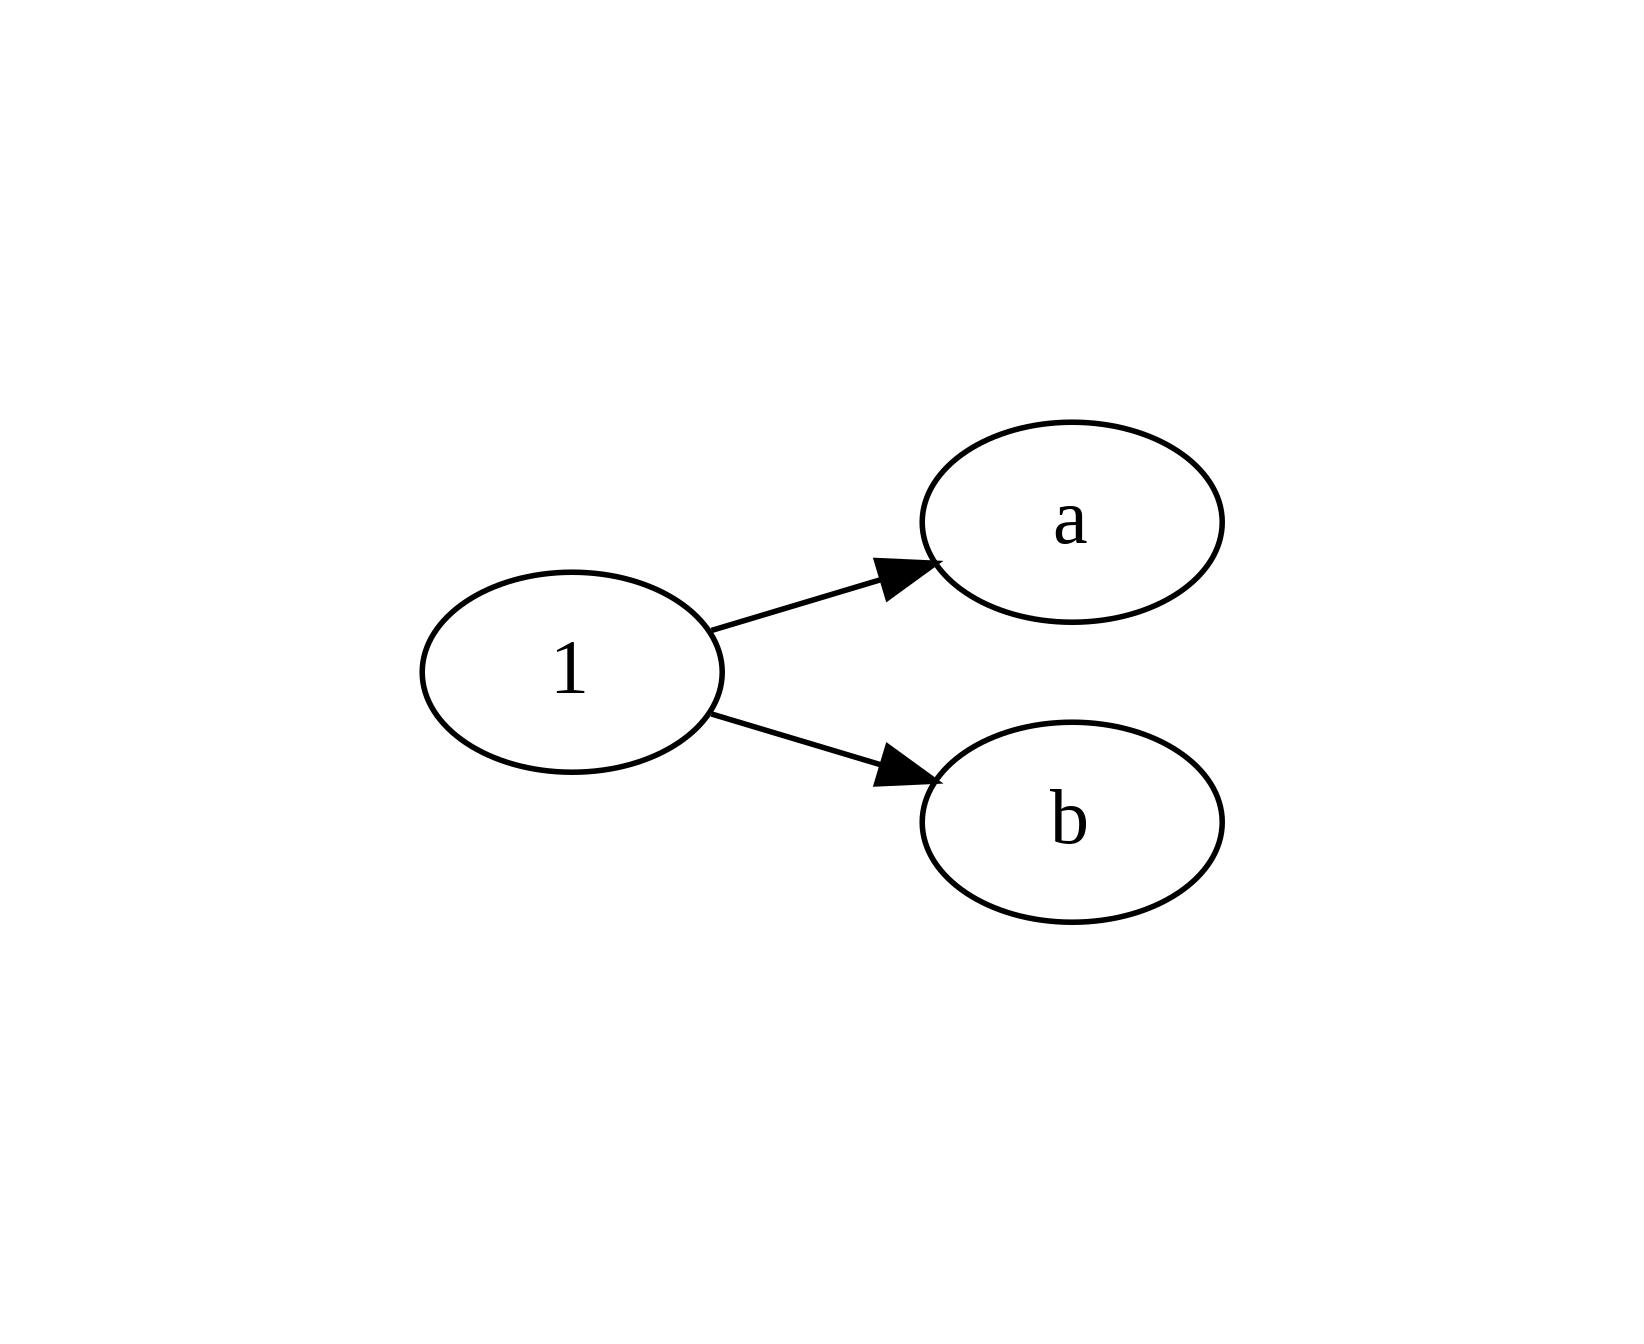

In [ ]:
import networkx as nx
g1 = nx.DiGraph()
g1.add_node('a')
g1.add_node(1)
g1.add_node('b')
print('Node:' , g1.nodes())
g1.add_edge(1, 'a') #에지 추가
g1.add_edge(1, 'b')
print('Edge:', g1.edges())

from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

d1 = to_pydot(g1)
d1.set_dpi(400)
d1.set_rankdir('LR')
d1.set_margin(1)
Image(d1.create_png(), width=300)


In [4]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher
from spacy.tokens import Span
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [6]:

candidate_sentences = pd.read_csv("wiki_sentences_v2.csv")
candidate_sentences.shape

(4318, 1)

In [9]:

def get_entities(sent):
    ent1 = ""
    ent2 = ""
    prv_tok_dep = ""        #문장에서 직전 토큰의 의존 파싱 태크
    prv_tok_text = ""       #문장에서 직전 토큰
    prefix = ""
    modifier = ""
    for tok in nlp(sent):
        #토큰이 구두점(punctuation mark)이면 다음 토큰으로 이동
        if tok.dep_ != "punct":
            if tok.dep_ == "compound": #토큰이 복합어인 경우
                prefix = tok.text
                if prv_tok_dep =="compound":    #직전 토큰이 복합어이면 현재 토큰과 결합
                    prefix = prv_tok_text + " " + tok.text
            if tok.dep_.endswith("mod") == True:    #토큰이 수식어인 경우
                modifier = tok.text
                if prv_tok_dep == "compound":   #직전 토큰이 수식어이면 현재 토큰을 결합
                    modifier = prv_tok_text + " " + tok.text

            if tok.dep_.find("subj") ==True : #주어(subject)인 경우
                ent1 = modifier + " " + prefix + " " + tok.text #수식어와 현재 토큰 결합 => 개체명 생성
                prefix = ""
                modifier =""
                prv_tok_dep = ""
                prv_tok_text = ""
            if tok.dep_.find("obj") == True: # 목적어인 경우
                ent2 = modifier + " " + prefix + " " + tok.text #수식어와 현재 토큰 결합 => 개체명 생성

            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text

    return [ent1.strip(), ent2.strip()]     #식별된 개체명 변환
#get_entities('the film had 200 patents')

In [10]:
entity_pairs = []

for i in tqdm(candidate_sentences["sentence"]):
    entity_pairs.append(get_entities(i))


100%|██████████| 4318/4318 [00:39<00:00, 109.08it/s]


In [11]:
entity_pairs[10:20]

[['we', 'tests'],
 ['m global', 'international sales rights'],
 ['robbie robertson', 'soundtrack'],
 ['it', 'original music tracks'],
 ['it', 'reviewed  franchise'],
 ['she', 'accidentally  mystique'],
 ['', 'military  arrest'],
 ['train', 'vuk'],
 ['telepath', 'gallio'],
 ['singer', 'men']]

In [12]:

def get_relation(sent):
    doc = nlp(sent)
    matcher = Matcher(nlp.vocab)
    #패턴 정의
    pattern = [{'DEP':'ROOT'},
               {'DEP':'prep','OP':"?"},
               {'DEP':'agent','OP':"?"},
               {'POS':'ADJ','OP':"?"}]
    matcher.add("matching_1", None, pattern)
    matches = matcher(doc)
    print('matches :', matches)
    k = len(matches) -1

    span = doc[matches[k][1]:matches[k][2]]
    return(span.text)

In [13]:
get_relation("John completed the task")

matches : [(11840699188806025751, 1, 2)]


'completed'

In [14]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

  1%|          | 23/4318 [00:00<00:40, 106.99it/s]

matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches 

  1%|          | 43/4318 [00:00<00:42, 101.27it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(118406991888060

  1%|▏         | 63/4318 [00:00<00:43, 98.11it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 16, 17)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 5, 6)]
matches : [(1184069918880602

  2%|▏         | 86/4318 [00:00<00:40, 103.24it/s]

matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (1

  2%|▏         | 98/4318 [00:00<00:39, 106.40it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 8, 9)]
matches : [(1184069

  3%|▎         | 122/4318 [00:01<00:38, 108.45it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [

  3%|▎         | 144/4318 [00:01<00:39, 105.99it/s]

matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 11, 12)]
matches : 

  4%|▍         | 166/4318 [00:01<00:39, 104.45it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(

  4%|▍         | 188/4318 [00:01<00:38, 105.93it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]


  5%|▍         | 210/4318 [00:02<00:39, 104.86it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8)]
matches 

  5%|▌         | 232/4318 [00:02<00:39, 103.40it/s]

matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 16, 17)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 4, 5)]


  6%|▌         | 253/4318 [00:02<00:41, 97.65it/s]

matches : [(11840699188806025751, 13, 14)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 14, 15)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]


  6%|▋         | 274/4318 [00:02<00:41, 97.61it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751

  7%|▋         | 295/4318 [00:02<00:40, 99.05it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 11, 12)]
matche

  7%|▋         | 317/4318 [00:03<00:38, 102.96it/s]

matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches :

  8%|▊         | 339/4318 [00:03<00:37, 105.99it/s]

matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 2, 3)]
matches : [(

  8%|▊         | 361/4318 [00:03<00:39, 100.86it/s]

matches : [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : 

  9%|▉         | 383/4318 [00:03<00:38, 101.20it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(1184069

  9%|▉         | 406/4318 [00:03<00:37, 104.88it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(118406991888060257

 10%|▉         | 429/4318 [00:04<00:36, 106.80it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [

 10%|█         | 451/4318 [00:04<00:37, 102.84it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 10, 1

 11%|█         | 473/4318 [00:04<00:38, 100.07it/s]

matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 32, 33)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (1184

 11%|█         | 484/4318 [00:04<00:38, 99.09it/s] 

matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 15, 16)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 21, 22)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 15, 16)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(118406991888060

 12%|█▏        | 507/4318 [00:04<00:37, 101.65it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3), (11840

 12%|█▏        | 531/4318 [00:05<00:35, 106.80it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(118406991888060

 13%|█▎        | 553/4318 [00:05<00:37, 101.58it/s]

matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]

 13%|█▎        | 575/4318 [00:05<00:36, 102.87it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(1184069

 14%|█▍        | 598/4318 [00:05<00:34, 107.62it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 1, 2)]
matches : 

 14%|█▍        | 621/4318 [00:06<00:34, 107.29it/s]

matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025

 15%|█▍        | 643/4318 [00:06<00:34, 106.84it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025

 15%|█▌        | 665/4318 [00:06<00:34, 105.38it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 14, 15)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (118406

 16%|█▌        | 687/4318 [00:06<00:35, 103.10it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 15, 16), (11840699188806025751, 15, 17)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(1

 16%|█▋        | 709/4318 [00:06<00:35, 101.57it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 2, 3)]
matches :

 17%|█▋        | 731/4318 [00:07<00:34, 103.71it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), 

 17%|█▋        | 753/4318 [00:07<00:34, 103.67it/s]

matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5), (118406

 18%|█▊        | 775/4318 [00:07<00:34, 101.47it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 8, 9), (1184069918

 18%|█▊        | 798/4318 [00:07<00:34, 103.47it/s]

matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 35, 36), (11840699188806025751, 35, 37)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 9, 10)]
matches : [(1

 19%|█▉        | 820/4318 [00:07<00:33, 104.98it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
mat

 19%|█▉        | 842/4318 [00:08<00:33, 102.79it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(118406991888060257

 20%|██        | 864/4318 [00:08<00:33, 102.16it/s]

matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 20%|██        | 875/4318 [00:08<00:34, 100.11it/s]

matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [

 21%|██        | 897/4318 [00:08<00:33, 103.49it/s]

matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(1184069918880602

 21%|██▏       | 920/4318 [00:08<00:32, 105.13it/s]

matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 16, 17)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 14, 15)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(1184

 22%|██▏       | 942/4318 [00:09<00:32, 104.30it/s]

matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 10, 11), (11840699188806025751, 12, 13), (11840699188806025751, 14, 15)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 10, 11), (11840699188806025751, 10

 22%|██▏       | 964/4318 [00:09<00:33, 100.01it/s]

matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 13, 14)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(1184069918880

 23%|██▎       | 986/4318 [00:09<00:32, 102.31it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840

 23%|██▎       | 1008/4318 [00:09<00:32, 103.37it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 13, 14)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
mat

 24%|██▍       | 1030/4318 [00:10<00:33, 97.76it/s] 

matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]

 24%|██▍       | 1050/4318 [00:10<00:33, 96.65it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 25%|██▍       | 1072/4318 [00:10<00:32, 100.11it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 14, 15)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699

 25%|██▌       | 1093/4318 [00:10<00:32, 99.33it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 14, 15)]
matches : [(11840699

 26%|██▌       | 1116/4318 [00:10<00:30, 105.02it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]


 26%|██▋       | 1138/4318 [00:11<00:30, 105.92it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 14, 15)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(1184069918880602

 27%|██▋       | 1160/4318 [00:11<00:29, 105.96it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)

 27%|██▋       | 1182/4318 [00:11<00:29, 104.78it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 13, 14)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :

 28%|██▊       | 1204/4318 [00:11<00:30, 103.61it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751,

 28%|██▊       | 1226/4318 [00:11<00:30, 102.23it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]

 29%|██▉       | 1249/4318 [00:12<00:29, 105.68it/s]

matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699

 29%|██▉       | 1272/4318 [00:12<00:28, 105.86it/s]

matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025

 30%|██▉       | 1294/4318 [00:12<00:28, 104.95it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3), (11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(118406

 30%|███       | 1305/4318 [00:12<00:30, 100.40it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188

 31%|███       | 1328/4318 [00:12<00:29, 102.64it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(

 31%|███▏      | 1350/4318 [00:13<00:28, 104.84it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 14, 15)]
matches : [(11840699188806025751, 3, 4), (1184069

 32%|███▏      | 1373/4318 [00:13<00:28, 104.98it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(1184069918880602

 32%|███▏      | 1395/4318 [00:13<00:27, 104.65it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 13, 14), (11840699188806025751, 13, 15), (11840699188806025751, 13, 16)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 5, 6)]
matches : [(118406991888060

 33%|███▎      | 1417/4318 [00:13<00:28, 103.09it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 15, 16)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 15, 16)]
matches : [(1184069918880

 33%|███▎      | 1439/4318 [00:13<00:29, 96.75it/s] 

matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8)]


 34%|███▍      | 1460/4318 [00:14<00:29, 96.64it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 13, 14), (11840699188806025751, 13, 15)]
matches : [(11840699188806025751, 26, 27)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (1

 34%|███▍      | 1480/4318 [00:14<00:29, 96.61it/s]

matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 10, 

 35%|███▍      | 1501/4318 [00:14<00:29, 95.29it/s]

matches : [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (1184

 35%|███▌      | 1521/4318 [00:14<00:29, 94.63it/s]

matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 13, 14), (11840699188806025751, 13, 15)]
matches : [(11840699188806025751, 26, 27)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751,

 36%|███▌      | 1542/4318 [00:15<00:28, 96.96it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 11, 12)]
matches : [(118406991888060

 36%|███▌      | 1563/4318 [00:15<00:28, 95.55it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches : [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 6, 7)]
mat

 37%|███▋      | 1584/4318 [00:15<00:28, 96.84it/s]

matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :

 37%|███▋      | 1604/4318 [00:15<00:28, 95.27it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 13, 14)]
matches : [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
mat

 38%|███▊      | 1625/4318 [00:15<00:27, 96.66it/s]

matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 19, 20)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 

 38%|███▊      | 1645/4318 [00:16<00:27, 95.81it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5), (1184069918

 38%|███▊      | 1655/4318 [00:16<00:28, 93.81it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 14, 15)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 14, 15)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025

 39%|███▉      | 1677/4318 [00:16<00:27, 97.58it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 14, 15), (11840699188806025751, 14, 16)]
mat

 39%|███▉      | 1698/4318 [00:16<00:26, 98.42it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(1184069918

 40%|███▉      | 1720/4318 [00:16<00:25, 101.91it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 16, 17)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6

 40%|████      | 1742/4318 [00:17<00:25, 102.07it/s]

matches : [(11840699188806025751, 14, 15), (11840699188806025751, 14, 16)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840

 41%|████      | 1764/4318 [00:17<00:24, 102.73it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 16, 17)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699

 41%|████▏     | 1786/4318 [00:17<00:25, 99.77it/s] 

matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 1, 2)

 42%|████▏     | 1807/4318 [00:17<00:25, 100.00it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1

 42%|████▏     | 1829/4318 [00:17<00:24, 103.13it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 3, 4), (11840699188806025751, 10, 11), (11840699188806025751, 15, 16), (11840699188806025751, 17, 18)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11), (11840699188806025751, 9, 12)]
matches : [(11840699188806025751, 9

 43%|████▎     | 1851/4318 [00:18<00:23, 104.59it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 

 43%|████▎     | 1874/4318 [00:18<00:23, 105.17it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025

 44%|████▍     | 1896/4318 [00:18<00:23, 104.45it/s]

matches : [(11840699188806025751, 15, 16), (11840699188806025751, 15, 17)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751

 44%|████▍     | 1919/4318 [00:18<00:22, 106.16it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matc

 45%|████▍     | 1941/4318 [00:19<00:22, 105.86it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 22, 23), (11840699188806025751, 22, 24)]
matches : [(11840699188806025751, 2, 3)]
matches : [(1184069918880

 45%|████▌     | 1963/4318 [00:19<00:21, 107.46it/s]

matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(118406991888060257

 46%|████▌     | 1985/4318 [00:19<00:21, 107.13it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751,

 46%|████▋     | 2007/4318 [00:19<00:22, 102.61it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 47%|████▋     | 2029/4318 [00:19<00:22, 103.72it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
m

 47%|████▋     | 2051/4318 [00:20<00:22, 102.80it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(1

 48%|████▊     | 2073/4318 [00:20<00:21, 102.77it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699

 49%|████▊     | 2095/4318 [00:20<00:22, 100.06it/s]

matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9), (11840699188806025751, 7, 10)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(1184069918880

 49%|████▉     | 2117/4318 [00:20<00:21, 100.84it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 14, 15)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 17, 18), (11840699188806025751, 17, 19)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]


 50%|████▉     | 2139/4318 [00:20<00:21, 102.96it/s]

matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 13, 14)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3), (11840699188806025751, 1, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (1184069918880602575

 50%|█████     | 2162/4318 [00:21<00:20, 105.38it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3), (11840699188806025751, 1, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9), (11840699188806025751, 7, 10)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 8, 9)]
matches : [(118406991

 50%|█████     | 2173/4318 [00:21<00:20, 102.55it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 13, 14)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]


 51%|█████     | 2195/4318 [00:21<00:20, 103.69it/s]

matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2

 51%|█████▏    | 2217/4318 [00:21<00:20, 102.09it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
m

 52%|█████▏    | 2240/4318 [00:21<00:19, 104.69it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11

 52%|█████▏    | 2263/4318 [00:22<00:19, 106.11it/s]

matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840

 53%|█████▎    | 2285/4318 [00:22<00:19, 102.90it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025

 53%|█████▎    | 2307/4318 [00:22<00:19, 104.97it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3)]
mat

 54%|█████▍    | 2329/4318 [00:22<00:19, 102.91it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 17, 18)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matches : [(11840699188806025751, 10, 11)]
matches : [(1184069918880

 54%|█████▍    | 2351/4318 [00:22<00:19, 101.57it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751,

 55%|█████▍    | 2374/4318 [00:23<00:18, 105.29it/s]

matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 13, 14)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699

 55%|█████▌    | 2396/4318 [00:23<00:18, 105.97it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 15, 16)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(118406

 56%|█████▌    | 2418/4318 [00:23<00:18, 103.76it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 15, 16)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(118406

 57%|█████▋    | 2440/4318 [00:23<00:18, 101.61it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 0, 1)]
matches :

 57%|█████▋    | 2462/4318 [00:24<00:17, 104.79it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)

 58%|█████▊    | 2484/4318 [00:24<00:17, 105.59it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 23, 24)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1,

 58%|█████▊    | 2506/4318 [00:24<00:17, 102.56it/s]

matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 23, 24)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699

 59%|█████▊    | 2529/4318 [00:24<00:16, 105.66it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(1184069918880

 59%|█████▉    | 2540/4318 [00:24<00:17, 101.02it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806

 59%|█████▉    | 2562/4318 [00:25<00:17, 100.72it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 13, 14)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 7, 8)

 60%|█████▉    | 2584/4318 [00:25<00:16, 104.13it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699

 60%|██████    | 2606/4318 [00:25<00:16, 101.36it/s]

matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 10, 11), (11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10), (11840699188806025751, 8, 

 61%|██████    | 2628/4318 [00:25<00:16, 101.24it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 15, 16)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 24, 25)]
matches : [(11840699188806025751, 2, 3)]


 61%|██████▏   | 2650/4318 [00:25<00:16, 99.33it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 15, 16)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699

 62%|██████▏   | 2670/4318 [00:26<00:17, 95.67it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 14, 15), (11840699188806025751, 14, 16)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2

 62%|██████▏   | 2690/4318 [00:26<00:16, 96.83it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 9, 10), (11840

 63%|██████▎   | 2713/4318 [00:26<00:15, 102.11it/s]

matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [

 63%|██████▎   | 2735/4318 [00:26<00:15, 101.42it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(118406991888060257

 64%|██████▍   | 2757/4318 [00:26<00:15, 103.74it/s]

matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches

 64%|██████▍   | 2779/4318 [00:27<00:14, 105.42it/s]

matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 13, 14), (11840699188806025751, 13, 15)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 14, 15)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : 

 65%|██████▍   | 2802/4318 [00:27<00:14, 107.34it/s]

matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 13, 14)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(

 65%|██████▌   | 2824/4318 [00:27<00:13, 107.05it/s]

matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), 

 66%|██████▌   | 2846/4318 [00:27<00:14, 103.93it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches : [(11840699188806025751, 8, 

 66%|██████▋   | 2868/4318 [00:28<00:13, 105.23it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4)]
matche

 67%|██████▋   | 2890/4318 [00:28<00:13, 103.22it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699

 67%|██████▋   | 2913/4318 [00:28<00:13, 105.57it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(118406991888060

 68%|██████▊   | 2935/4318 [00:28<00:13, 102.56it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(118406991888060257

 68%|██████▊   | 2946/4318 [00:28<00:13, 101.59it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 1, 2)]


 69%|██████▊   | 2967/4318 [00:29<00:13, 97.07it/s]

matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 2, 3)]


 69%|██████▉   | 2988/4318 [00:29<00:13, 98.84it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]


 70%|██████▉   | 3010/4318 [00:29<00:12, 103.98it/s]

matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(118406991888060257

 70%|███████   | 3032/4318 [00:29<00:12, 102.70it/s]

matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 6, 7

 71%|███████   | 3054/4318 [00:29<00:12, 101.70it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 14, 15)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]


 71%|███████▏  | 3077/4318 [00:30<00:11, 105.10it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (118

 72%|███████▏  | 3099/4318 [00:30<00:11, 104.77it/s]

matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 13, 14)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 8, 9)]
matches : [(1184069918880602

 72%|███████▏  | 3121/4318 [00:30<00:11, 102.59it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(1184069918

 73%|███████▎  | 3143/4318 [00:30<00:11, 103.89it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 1, 2)]


 73%|███████▎  | 3165/4318 [00:30<00:11, 101.18it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 6, 7)]


 74%|███████▍  | 3186/4318 [00:31<00:11, 99.44it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 2, 3)]


 74%|███████▍  | 3206/4318 [00:31<00:11, 95.14it/s]

matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]


 75%|███████▍  | 3228/4318 [00:31<00:10, 99.35it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3), (11840699188806025751, 16, 17)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(1184069918880602575

 75%|███████▌  | 3250/4318 [00:31<00:10, 103.25it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13), (11840699188806025751, 11, 14)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (118406991888060

 76%|███████▌  | 3273/4318 [00:32<00:09, 104.65it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751

 76%|███████▋  | 3295/4318 [00:32<00:09, 106.20it/s]

matches : [(11840699188806025751, 15, 16), (11840699188806025751, 15, 17)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches : [(11840699188806025751, 18, 19), (11840699188806025751, 18, 20)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751

 77%|███████▋  | 3317/4318 [00:32<00:09, 105.86it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751

 77%|███████▋  | 3339/4318 [00:32<00:09, 105.09it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(1184069918

 78%|███████▊  | 3350/4318 [00:32<00:09, 102.22it/s]

matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9), (11840699188806025751, 7, 10)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 4, 5), (118406991888

 78%|███████▊  | 3385/4318 [00:33<00:08, 105.90it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4,

 79%|███████▊  | 3396/4318 [00:33<00:08, 105.54it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699

 79%|███████▉  | 3419/4318 [00:33<00:08, 103.52it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)

 80%|███████▉  | 3442/4318 [00:33<00:08, 106.03it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]


 80%|████████  | 3465/4318 [00:33<00:07, 107.33it/s]

matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3), (11840699188806025751, 6, 7)]
matches : [(1184069918

 81%|████████  | 3488/4318 [00:34<00:07, 105.79it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3), (11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751,

 81%|████████▏ | 3510/4318 [00:34<00:07, 105.41it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7), (1184069918

 82%|████████▏ | 3532/4318 [00:34<00:07, 102.80it/s]

matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 23, 24), (11840699188806025751, 23, 25), (11840699188806025751, 23, 26)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 22, 23)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1,

 82%|████████▏ | 3554/4318 [00:34<00:07, 101.26it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches :

 83%|████████▎ | 3575/4318 [00:34<00:07, 98.82it/s]

matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 9, 10)]
matches :

 83%|████████▎ | 3597/4318 [00:35<00:07, 102.16it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), 

 84%|████████▍ | 3619/4318 [00:35<00:06, 103.17it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 16, 17)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(118406991888060

 84%|████████▍ | 3642/4318 [00:35<00:06, 105.99it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 

 85%|████████▍ | 3664/4318 [00:35<00:06, 106.30it/s]

matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 14, 15), (11840699188806025751, 14, 16)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(118406

 85%|████████▌ | 3686/4318 [00:35<00:06, 105.02it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 15, 16)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)

 86%|████████▌ | 3708/4318 [00:36<00:05, 105.64it/s]

matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 20, 21), (11840699188806025751, 20, 22)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 15, 16)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 

 86%|████████▋ | 3730/4318 [00:36<00:05, 103.67it/s]

matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 20, 21), (11840699188806025751, 20, 22)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1,

 87%|████████▋ | 3752/4318 [00:36<00:05, 102.76it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751,

 87%|████████▋ | 3775/4318 [00:36<00:05, 106.85it/s]

matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
mat

 88%|████████▊ | 3786/4318 [00:36<00:05, 100.28it/s]

matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
mat

 88%|████████▊ | 3808/4318 [00:37<00:05, 100.76it/s]

matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9), (11840699188806025751, 7, 10)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9), (11840699188806025751, 7, 10)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
m

 89%|████████▊ | 3830/4318 [00:37<00:04, 100.24it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3), (11840699188806025751, 1, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
mat

 89%|████████▉ | 3852/4318 [00:37<00:04, 100.33it/s]

matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3), (11840699188806025751, 1, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188

 90%|████████▉ | 3874/4318 [00:37<00:04, 99.41it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), 

 90%|█████████ | 3894/4318 [00:38<00:04, 95.00it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (

 91%|█████████ | 3914/4318 [00:38<00:04, 95.82it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 8, 9)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11

 91%|█████████ | 3935/4318 [00:38<00:03, 97.78it/s]

matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11

 92%|█████████▏| 3957/4318 [00:38<00:03, 99.53it/s]

matches : [(11840699188806025751, 0, 1), (11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751,

 92%|█████████▏| 3977/4318 [00:38<00:03, 94.23it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 13, 14)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]


 93%|█████████▎| 3998/4318 [00:39<00:03, 94.32it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 13, 14), (11840699188806025751, 13, 15)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
mat

 93%|█████████▎| 4019/4318 [00:39<00:03, 98.88it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 0, 1)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 4, 5),

 94%|█████████▎| 4040/4318 [00:39<00:02, 101.12it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 12, 13)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 0, 1), (118406

 94%|█████████▍| 4063/4318 [00:39<00:02, 105.42it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11

 95%|█████████▍| 4085/4318 [00:39<00:02, 104.80it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 0, 1), (11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751,

 95%|█████████▌| 4107/4318 [00:40<00:02, 102.92it/s]

matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(1184069918880602575

 96%|█████████▌| 4129/4318 [00:40<00:01, 102.66it/s]

matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches : [(11840699188

 96%|█████████▌| 4151/4318 [00:40<00:01, 103.42it/s]

matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (1184069918880602

 97%|█████████▋| 4174/4318 [00:40<00:01, 106.87it/s]

matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 16, 17), (11840699188806025751, 16, 18)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(118406

 97%|█████████▋| 4197/4318 [00:41<00:01, 107.45it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches : [(11840699188806025751, 16, 17), (11840699188806025751, 16, 18)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699

 98%|█████████▊| 4219/4318 [00:41<00:00, 104.82it/s]

matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751,

 98%|█████████▊| 4241/4318 [00:41<00:00, 103.93it/s]

matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 10, 11)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 1, 2), (11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 5, 6

 98%|█████████▊| 4252/4318 [00:41<00:00, 101.91it/s]

matches : [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 14, 15)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 11, 12)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 15, 16)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025

 99%|█████████▉| 4275/4318 [00:41<00:00, 103.37it/s]

matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches : [(11840699188806025751, 5, 6)]
matches : [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14), (11840699188806025751, 12, 15)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 7, 8)]
matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 9, 10)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 

100%|█████████▉| 4297/4318 [00:42<00:00, 101.18it/s]

matches : [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 4, 5)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 6, 7)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 3, 4)]
matches : [(1184069918

100%|██████████| 4318/4318 [00:42<00:00, 102.28it/s]

matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches : [(11840699188806025751, 1, 2)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 3, 4)]
matches : [(11840699188806025751, 2, 3)]
matches : [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


In [16]:

#주어(subject) 추출
source = [i[0] for i in entity_pairs]
#목적어(object) 추출
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [17]:

#방향 그래프 생성
G = nx.from_pandas_edgelist(kg_df, "source","target",
                            edge_attr=True, create_using=nx.MultiDiGraph())

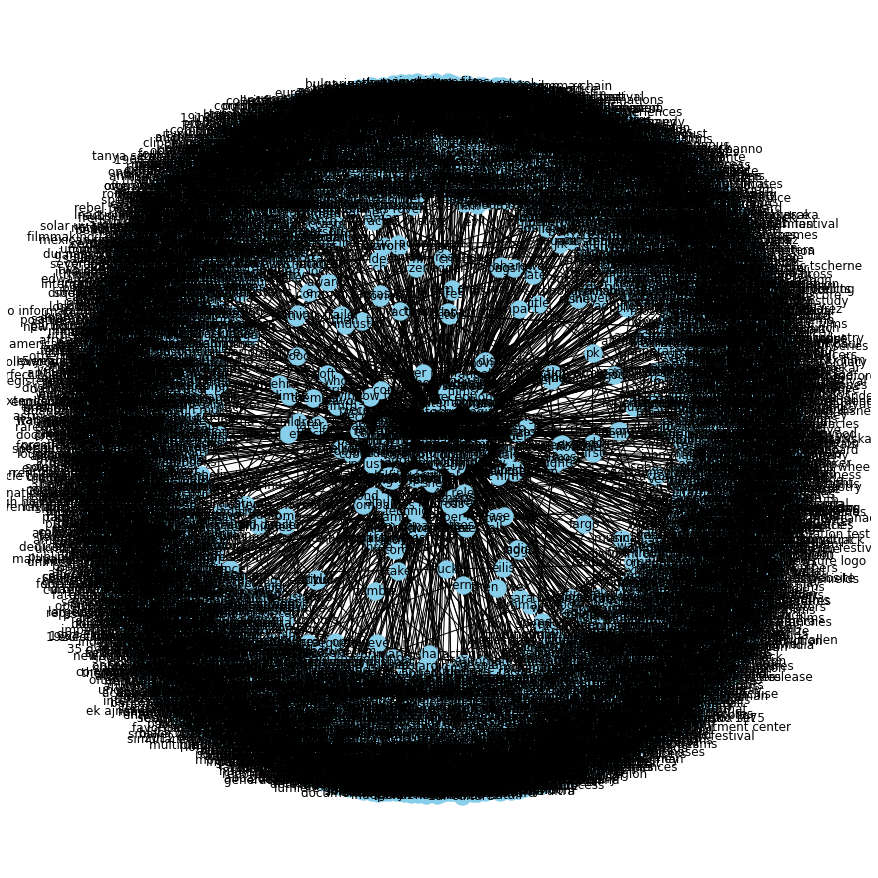

In [18]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

AttributeError: ignored

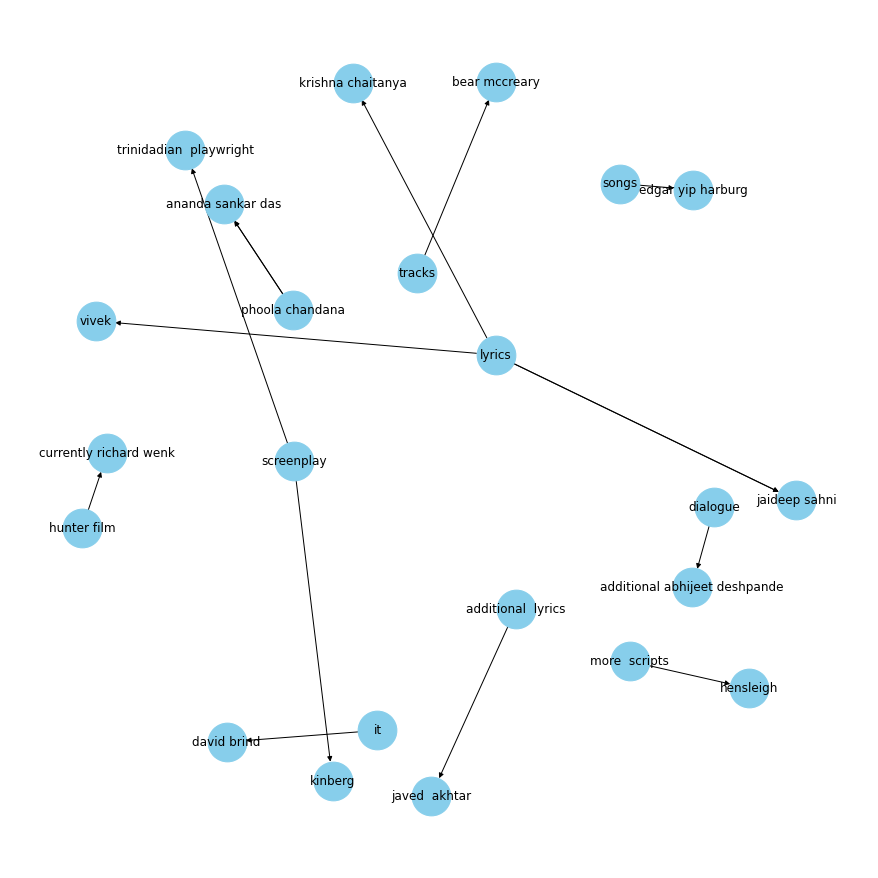

In [19]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="written by"], "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500,edge_cmap=plt.cm.Blues, pos=pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels="written by")
plt.show()

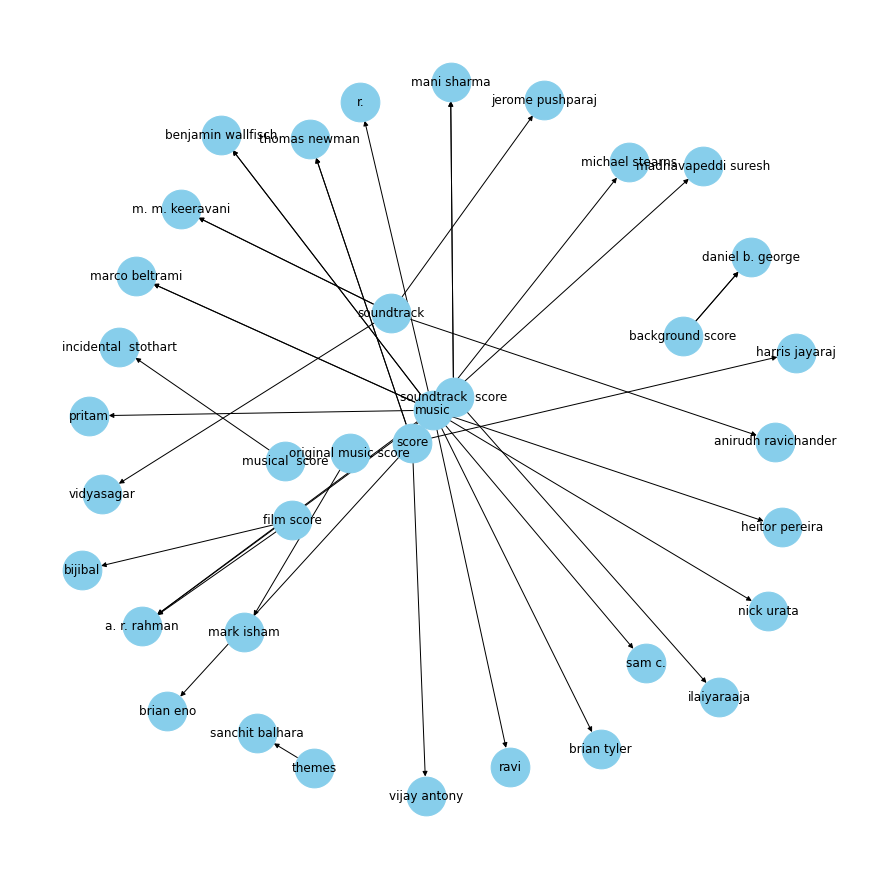

In [20]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos=pos)
plt.show()